In [1]:
import os

os.chdir('../')

%pwd

os.listdir()

['.git',
 '.gitignore',
 '.venv',
 'app.py',
 'artifacts',
 'config',
 'LICENSE',
 'logs',
 'main.py',
 'params.yaml',
 'README.md',
 'requirements.txt',
 'research',
 'schema.yaml',
 'setup.py',
 'src',
 'template.py',
 'templates',
 'winequality-data.zip']

## Imports

In [2]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Import the dataset

In [3]:
wines = pl.read_csv("artifacts\data_ingestion\WineQT.csv")
wines = wines.to_pandas()
wines.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

## Basic checks

In [4]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
wines.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

In [6]:
print(wines.isna().sum())
'''
No null values.
Which means there is no need for null values cleaning.
'''

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


'\nNo null values.\nWhich means there is no need for null values cleaning.\n'

In [7]:
'''
From the min and max values of the quality column we can say that it may be the categorical value but encoded in numbers.
'''

wines[['quality']].value_counts()

quality
5          483
6          462
7          143
4           33
8           16
3            6
Name: count, dtype: int64

## Data visualization

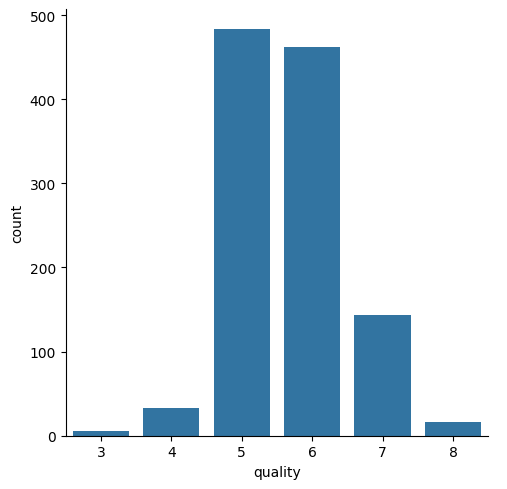

In [8]:
sns.catplot(x='quality', data=wines, kind='count')

'\nIgnore the graph of quality vs quality.\n\n1. Fixed Acidity: Slight increase in fixed acidity with wine quality, highest at quality 8.\n2. Volatile Acidity: Volatile acidity decreases as wine quality increases.\n3. Citric Acid: Higher citric acid content is associated with better quality wines.\n4. Residual Sugar: Residual sugar remains fairly constant across all quality levels.\n5. Chlorides: Slight decrease in chlorides with increasing wine quality.\n6. Free Sulfur Dioxide: Peaks around quality 5, then decreases for higher qualities.\n7. Total Sulfur Dioxide: Total sulfur dioxide decreases steadily with increasing quality.\n8. Density: Density shows minimal change and remains relatively constant.\n9. pH: pH levels are fairly stable across different wine qualities.\n10. Sulphates: Higher sulphate content is linked with higher wine quality.\n11. Alcohol: Alcohol content increases noticeably with wine quality.\n'

<Figure size 1500x1000 with 0 Axes>

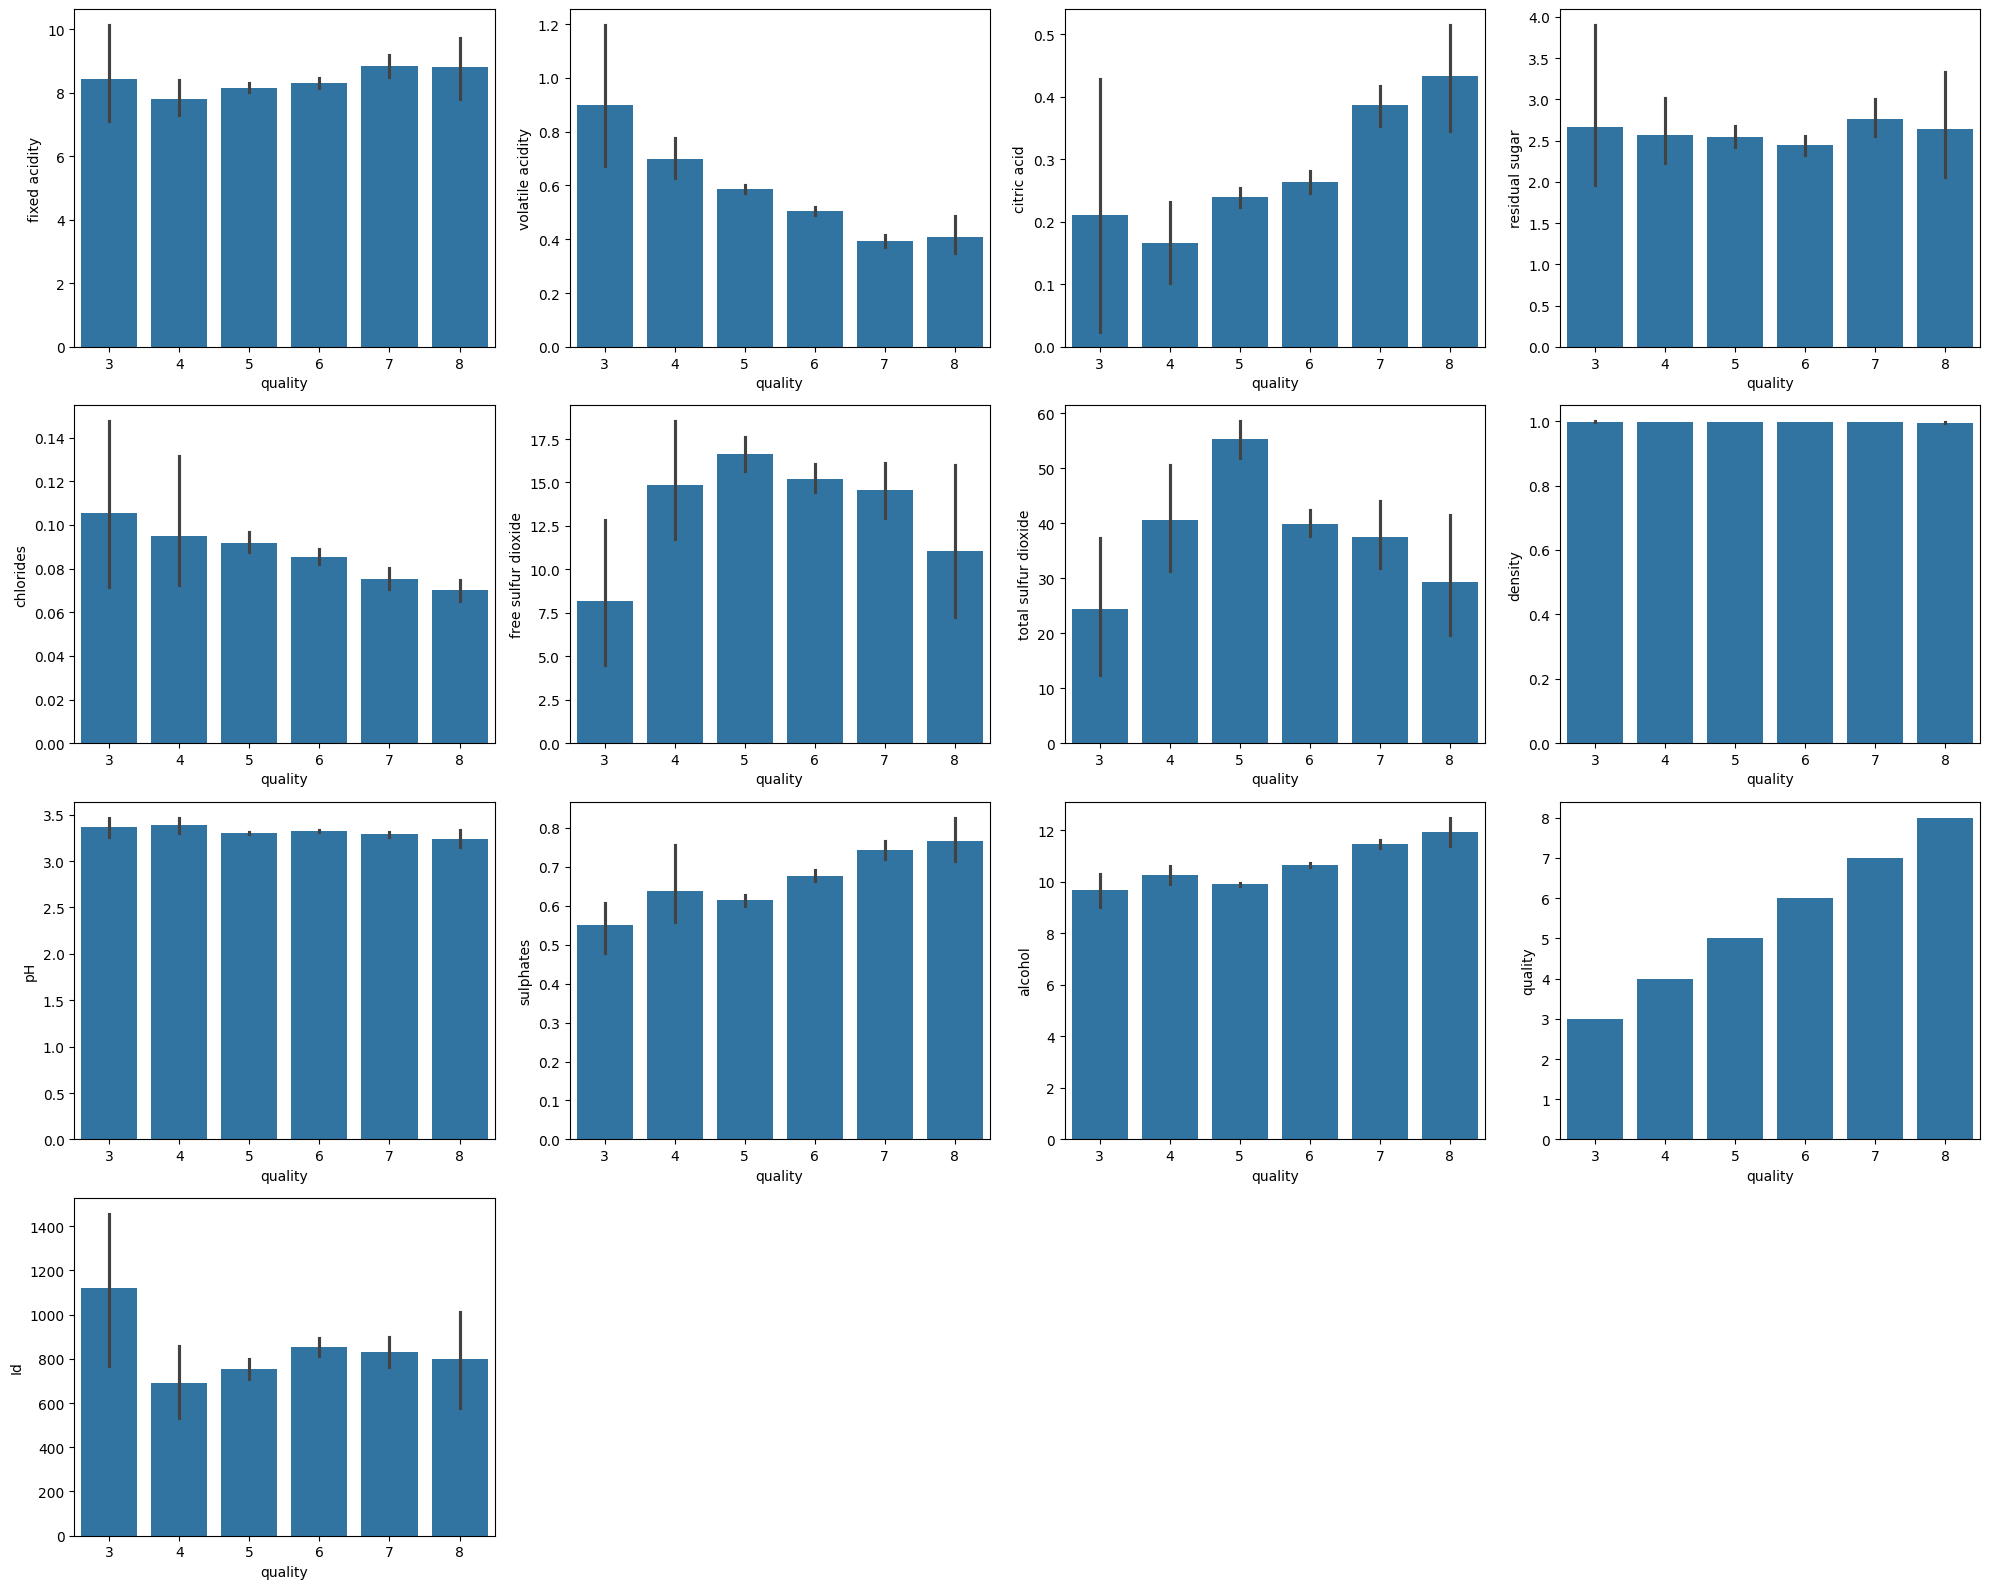

In [9]:
plt.figure(figsize=(15, 10))
no_columns = len(wines.select_dtypes(include=['float64', 'int64']).columns)
cols = 4
rows = math.ceil(no_columns/cols)
plt.figure(figsize=(5 * cols, 4 * rows))

for i, col in enumerate(wines.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(rows, cols, i+1)
    sns.barplot(x=wines['quality'], y=wines[col])
    plt.tight_layout()


'''
Ignore the graph of quality vs quality.

1. Fixed Acidity: Slight increase in fixed acidity with wine quality, highest at quality 8.
2. Volatile Acidity: Volatile acidity decreases as wine quality increases.
3. Citric Acid: Higher citric acid content is associated with better quality wines.
4. Residual Sugar: Residual sugar remains fairly constant across all quality levels.
5. Chlorides: Slight decrease in chlorides with increasing wine quality.
6. Free Sulfur Dioxide: Peaks around quality 5, then decreases for higher qualities.
7. Total Sulfur Dioxide: Total sulfur dioxide decreases steadily with increasing quality.
8. Density: Density shows minimal change and remains relatively constant.
9. pH: pH levels are fairly stable across different wine qualities.
10. Sulphates: Higher sulphate content is linked with higher wine quality.
11. Alcohol: Alcohol content increases noticeably with wine quality.
'''

In [10]:
'''
Since we are dealing with the classification problem and the target column has imbalance data. We will group the data so better efficiency, or we can add synthetic data also (using imblearn) but grouping is better.

Values (3, 4, 5) will be '0' which means bad quality of wine.
Values (6, 7, 8) will be '1' which means good quality of wine.
'''

wines['quality'] = wines['quality'].apply(lambda y: 1 if y >= 6 else 0 )

In [11]:
wines['quality'].head()

0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: int64

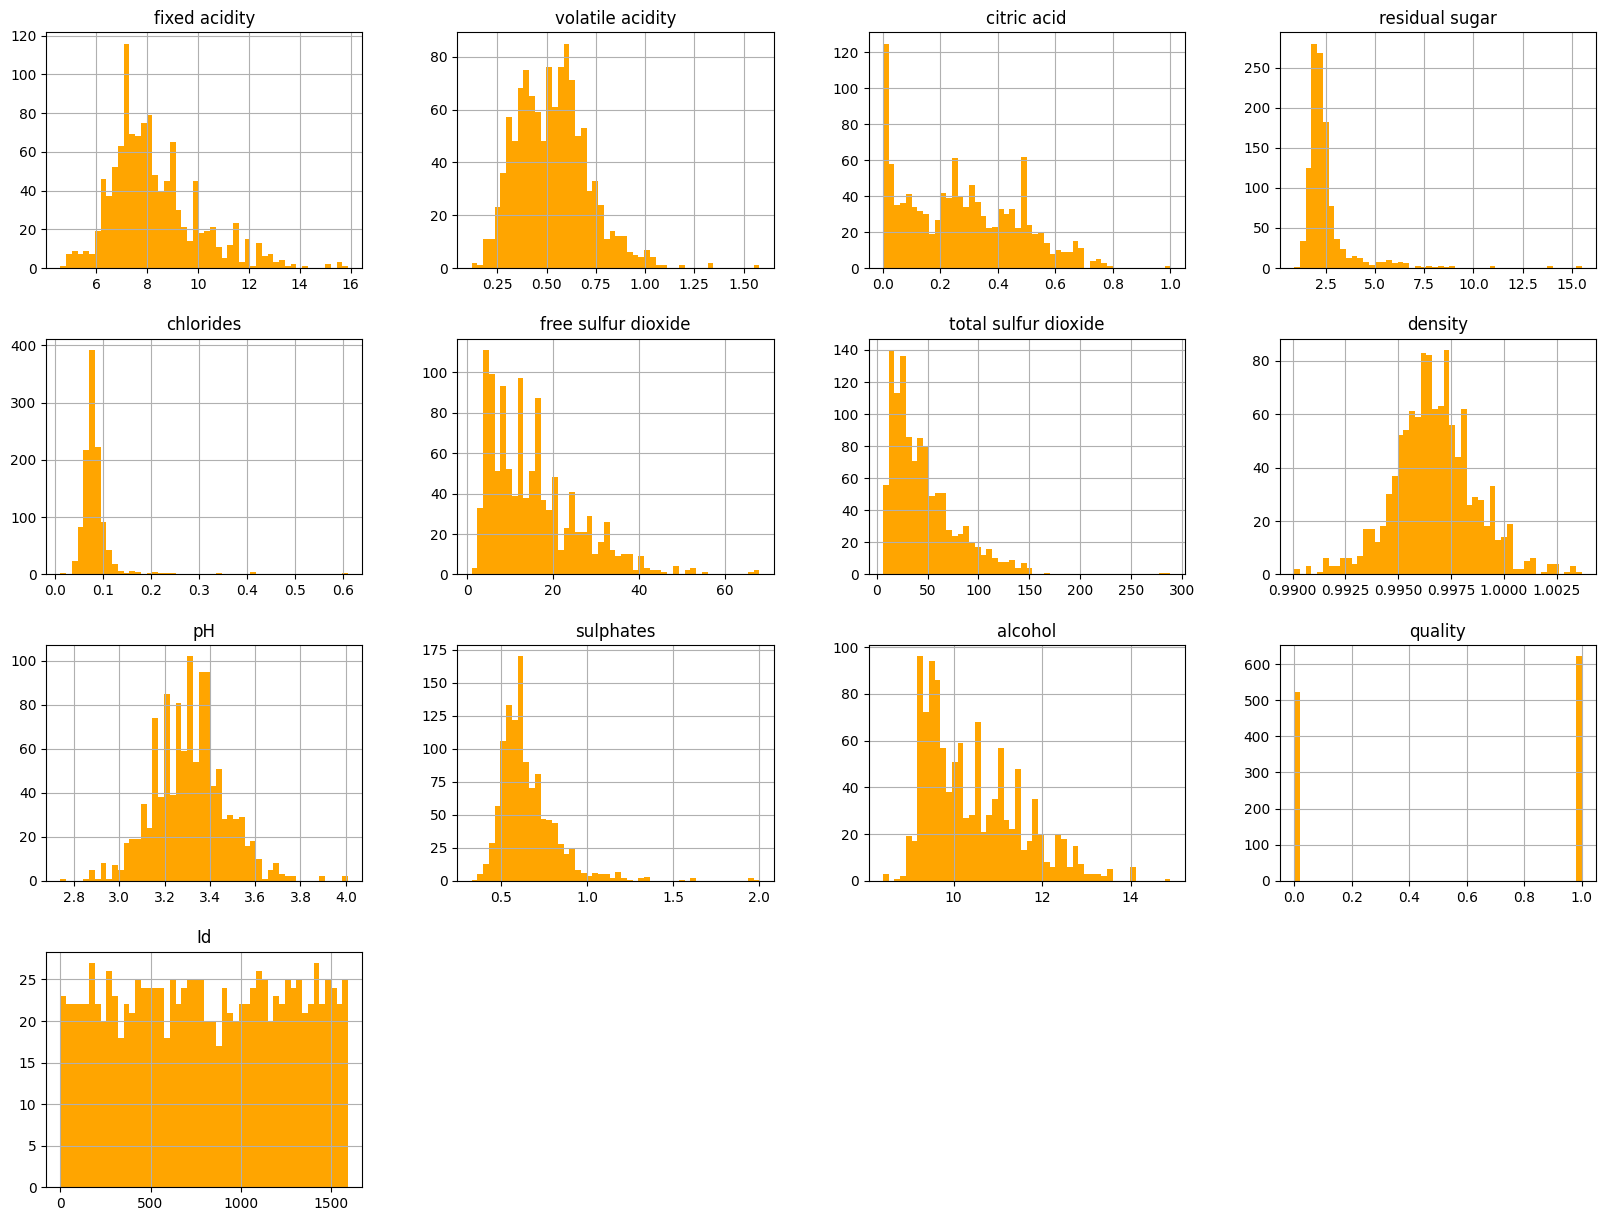

In [12]:
## It displays the frequency of all the points in the particular column.
wines.hist(bins=50, figsize=(20, 15), color='orange')
plt.show()

<Figure size 1500x1000 with 0 Axes>

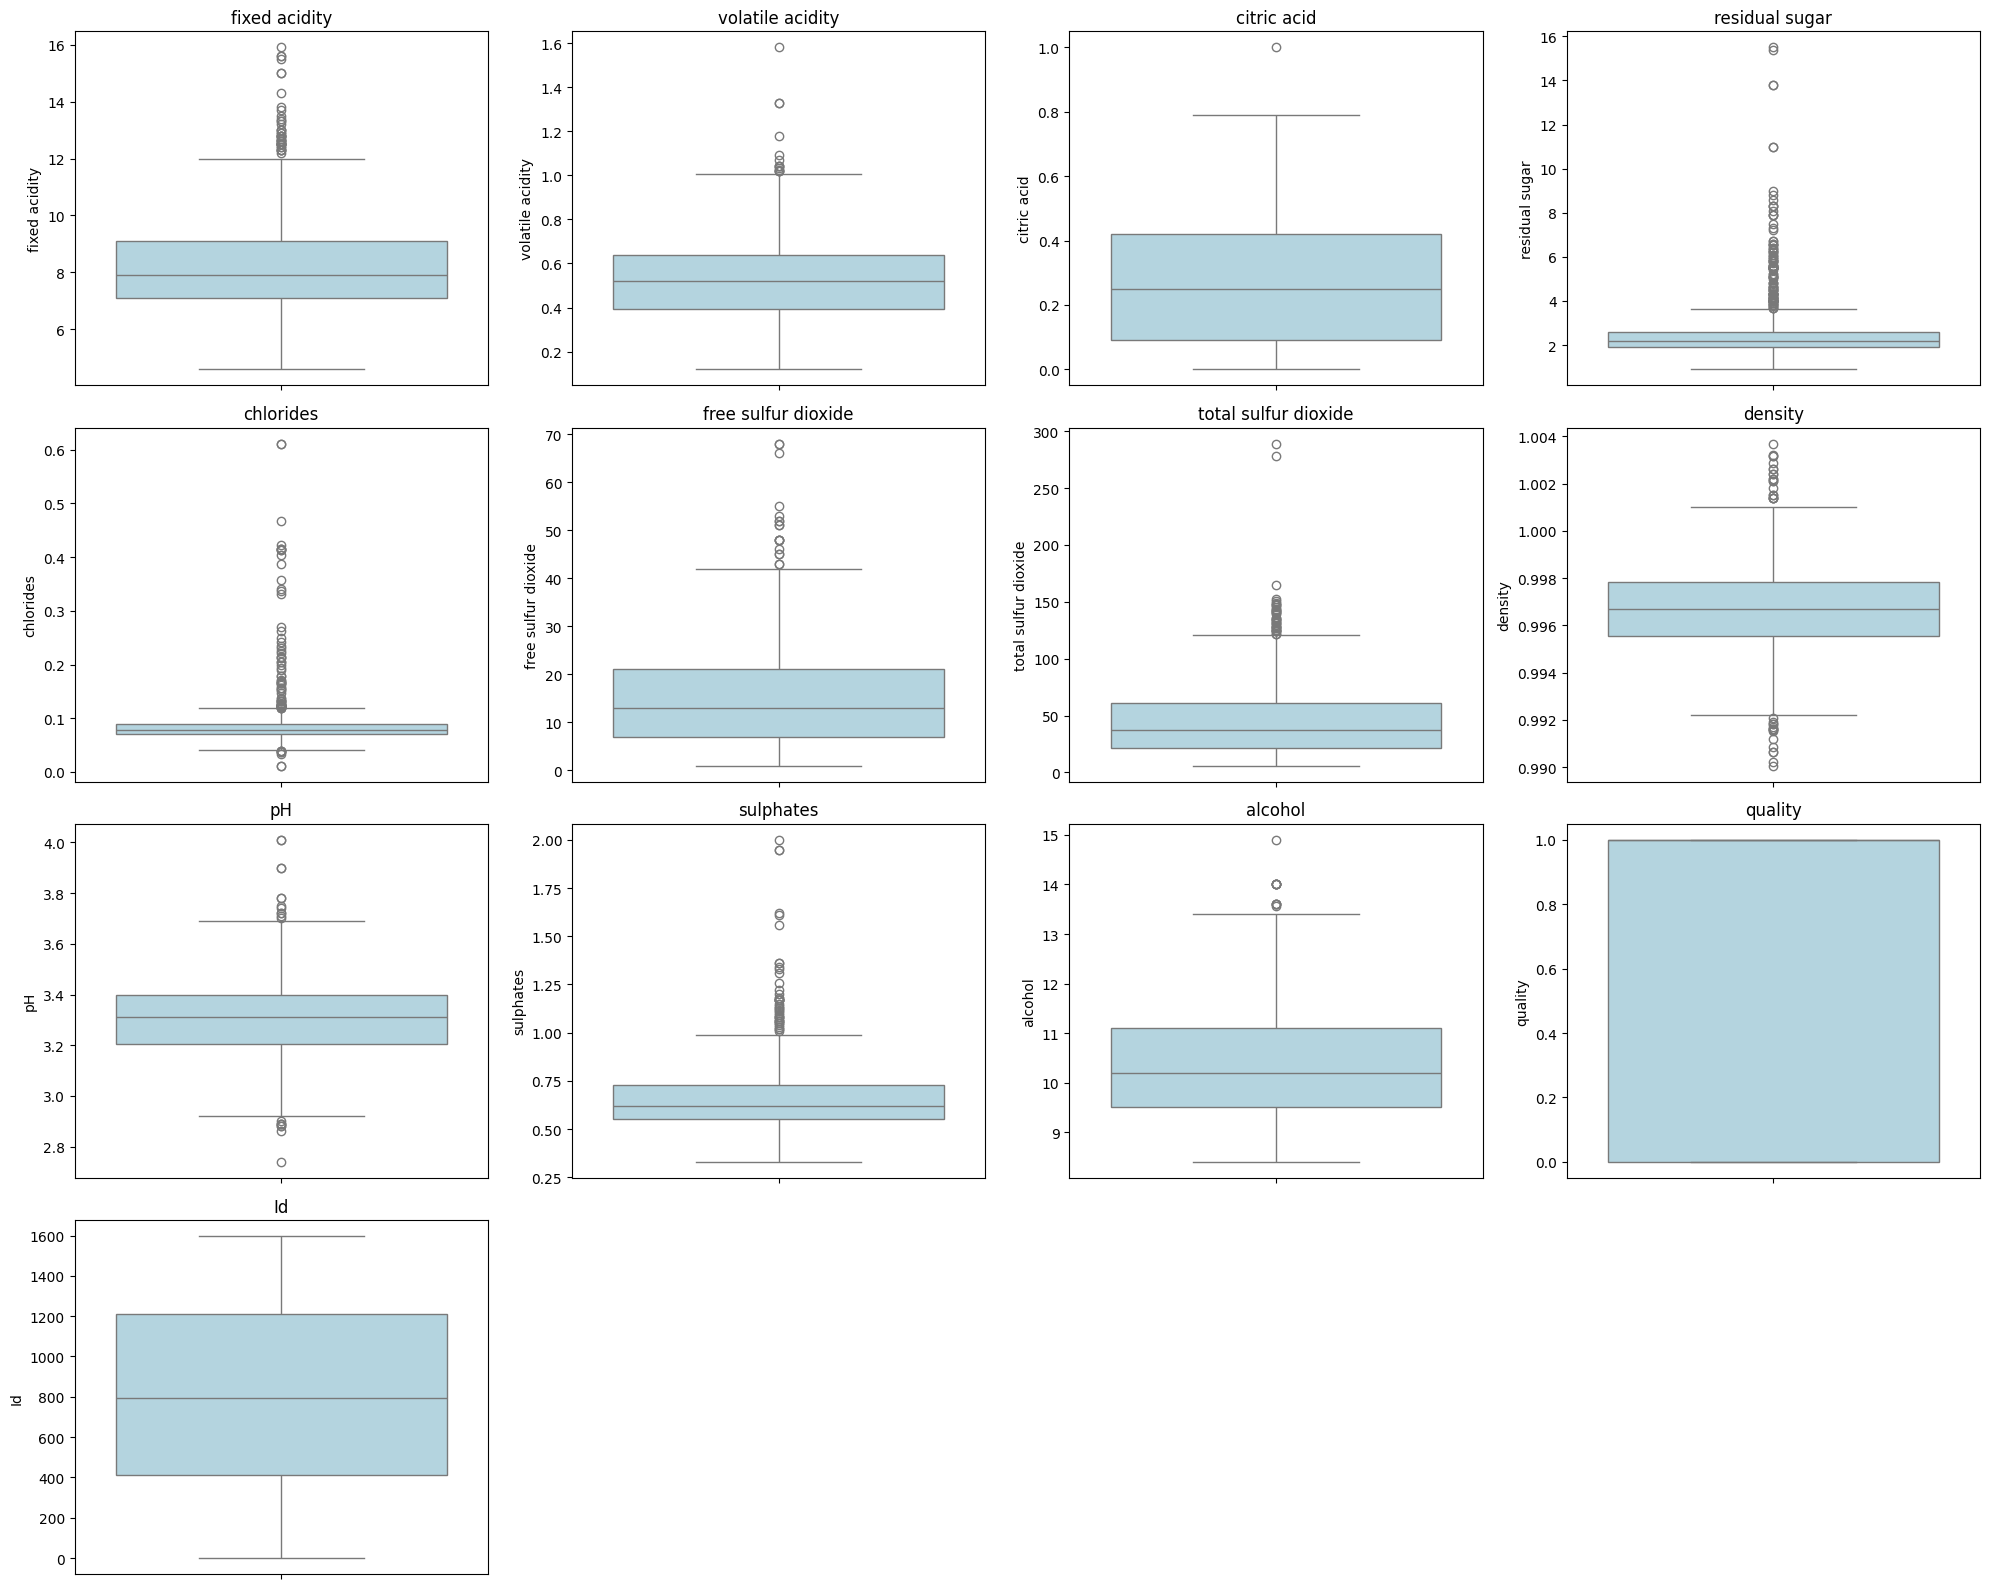

" \nFrom the boxplot it can be seen clearly that some columns contains outliers.\nLet's treat the outliers.\n"

In [13]:
plt.figure(figsize=(15, 10))
no_columns = len(wines.select_dtypes(include=['float64', 'int64']).columns)
cols = 4
rows = math.ceil(no_columns/cols)
plt.figure(figsize=(5 * cols, 4 * rows))

for i, col in enumerate(wines.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(rows, cols, i+1)
    sns.boxplot(y=wines[col], color='lightblue')
    plt.title(col)
    plt.tight_layout()
plt.show()


''' 
From the boxplot it can be seen clearly that some columns contains outliers.
Let's treat the outliers.
'''

## Outlier removal

In [ ]:
'''
Avoid this.
'''


def remove_outliers(data:pd.DataFrame):
    df_clean = data.copy()
    for col in df_clean.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR

        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

print(f"Original shape: {wines.shape}")

wines = remove_outliers(wines)
print(f"Shape after outlier removal: {wines.shape}")

In [ ]:
''' Outliers are removed as per the above results. Let's cross check by plotting.'''
plt.figure(figsize=(15, 10))
no_columns = len(wines.select_dtypes(include=['float64', 'int64']).columns)
cols = 4
rows = math.ceil(no_columns/cols)
plt.figure(figsize=(5 * cols, 4 * rows))

for i, col in enumerate(wines.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(rows, cols, i+1)
    sns.boxplot(y=wines[col], color='lightblue')
    plt.title(col)
    plt.tight_layout()
plt.show()

''' 
From the boxplot it can be seen clearly that some outliers aren't removed yet.
Let's treat the outliers.
'''

In [ ]:
'''
NOTE :-
Run the remove outliers function for 3 to 4 times to remove the outlires completely.
'''

print(f"Original shape: {wines.shape}")

wines = remove_outliers(wines)
print(f"Shape after outlier removal: {wines.shape}")

In [ ]:
plt.figure(figsize=(15, 10))
no_columns = len(wines.select_dtypes(include=['float64', 'int64']).columns)
cols = 4
rows = math.ceil(no_columns/cols)
plt.figure(figsize=(5 * cols, 4 * rows))

for i, col in enumerate(wines.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(rows, cols, i+1)
    sns.boxplot(y=wines[col], color='lightblue')
    plt.title(col)
    plt.tight_layout()
plt.show()

'''
Now we can see that the outliers are removed completely.
Let's start training the model.
'''

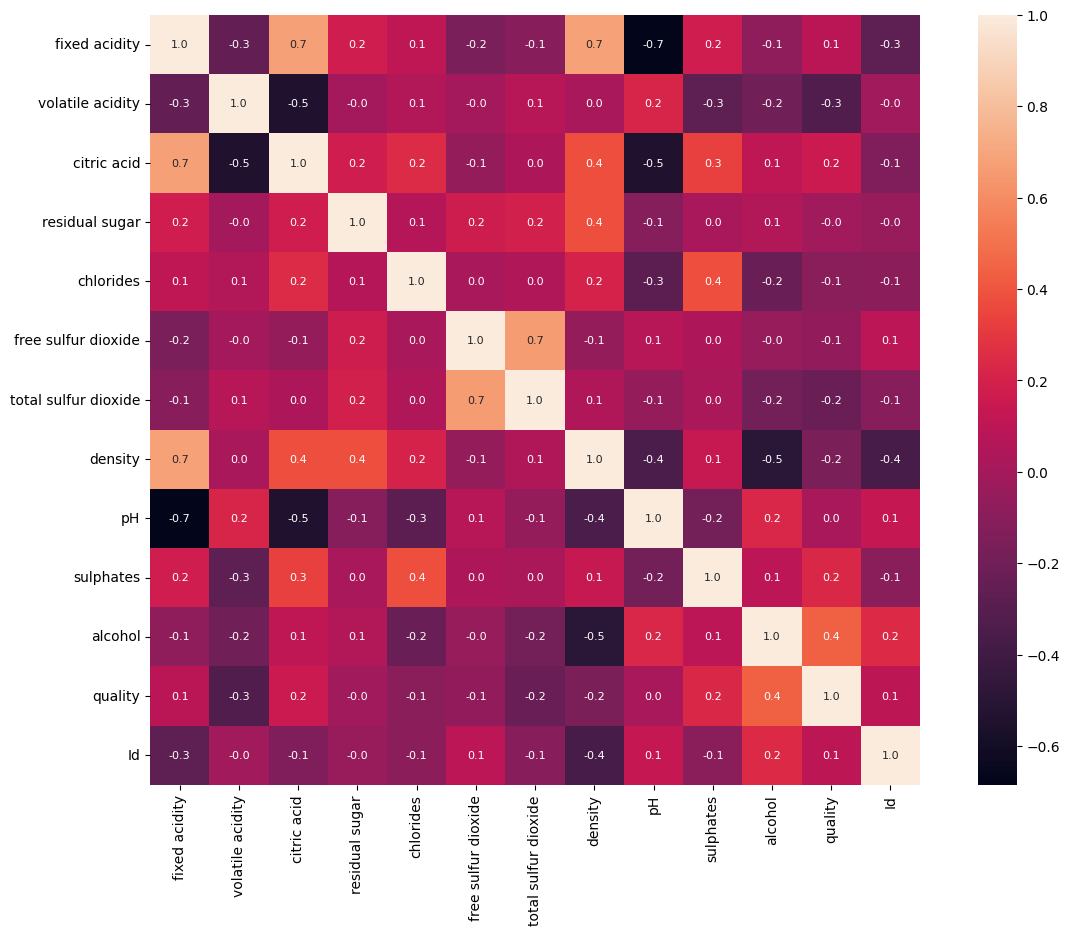

'\nFrom the graph we can see that there are very few columns which are highly correlated with the "quality" column.\nFor clearification let\'s write a function that will show all the columns which correlated to the "quality" and there corrleation.\n'

In [14]:
'''
Before model training let's the correlation matrix for feature selection.
'''

plt.figure(figsize=(15, 10))

corr_matrix = wines.corr()
sns.heatmap(corr_matrix, annot=True, cbar=True, square=True, fmt='.1f', annot_kws={'size': 8})
plt.show()

'''
From the graph we can see that there are very few columns which are highly correlated with the "quality" column.
For clearification let's write a function that will show all the columns which correlated to the "quality" and there corrleation.
'''

In [15]:
def find_correlation(corr_matrix, target_column):
    corr_series = corr_matrix[target_column].drop(target_column)
    corr_series = corr_series.round(1)
    corr_percentage = (corr_series * 100).round(2)

    return corr_percentage.sort_values(ascending=False).rename("Correlation (%)")

correlation_with_quality = find_correlation(corr_matrix, 'quality')
print(correlation_with_quality)

'''
We can see that the columns [alcohol, sulphates, citric acid, Id, volatile acidity, density, chlorides, total sulfur dioxide] are in a good correlation.
Now let's split the dataset and start training the model.
'''

alcohol                 40.0
citric acid             20.0
sulphates               20.0
fixed acidity           10.0
Id                      10.0
residual sugar          -0.0
pH                       0.0
free sulfur dioxide    -10.0
chlorides              -10.0
density                -20.0
total sulfur dioxide   -20.0
volatile acidity       -30.0
Name: Correlation (%), dtype: float64


"\nWe can see that the columns [alcohol, sulphates, citric acid, Id, volatile acidity, density, chlorides, total sulfur dioxide] are in a good correlation.\nNow let's split the dataset and start training the model.\n"

## Model training

In [16]:
'''
Extract the input and output columns from the dataset.
'''

'''
Before splitting in x and y.
Remove the Id column as it's not a real feature.
'''
x = wines.drop(columns=['Id' ,'quality'])
y = wines[['quality']]

In [17]:
print(f"{x.shape} \n{y.shape}")

(1143, 11) 
(1143, 1)


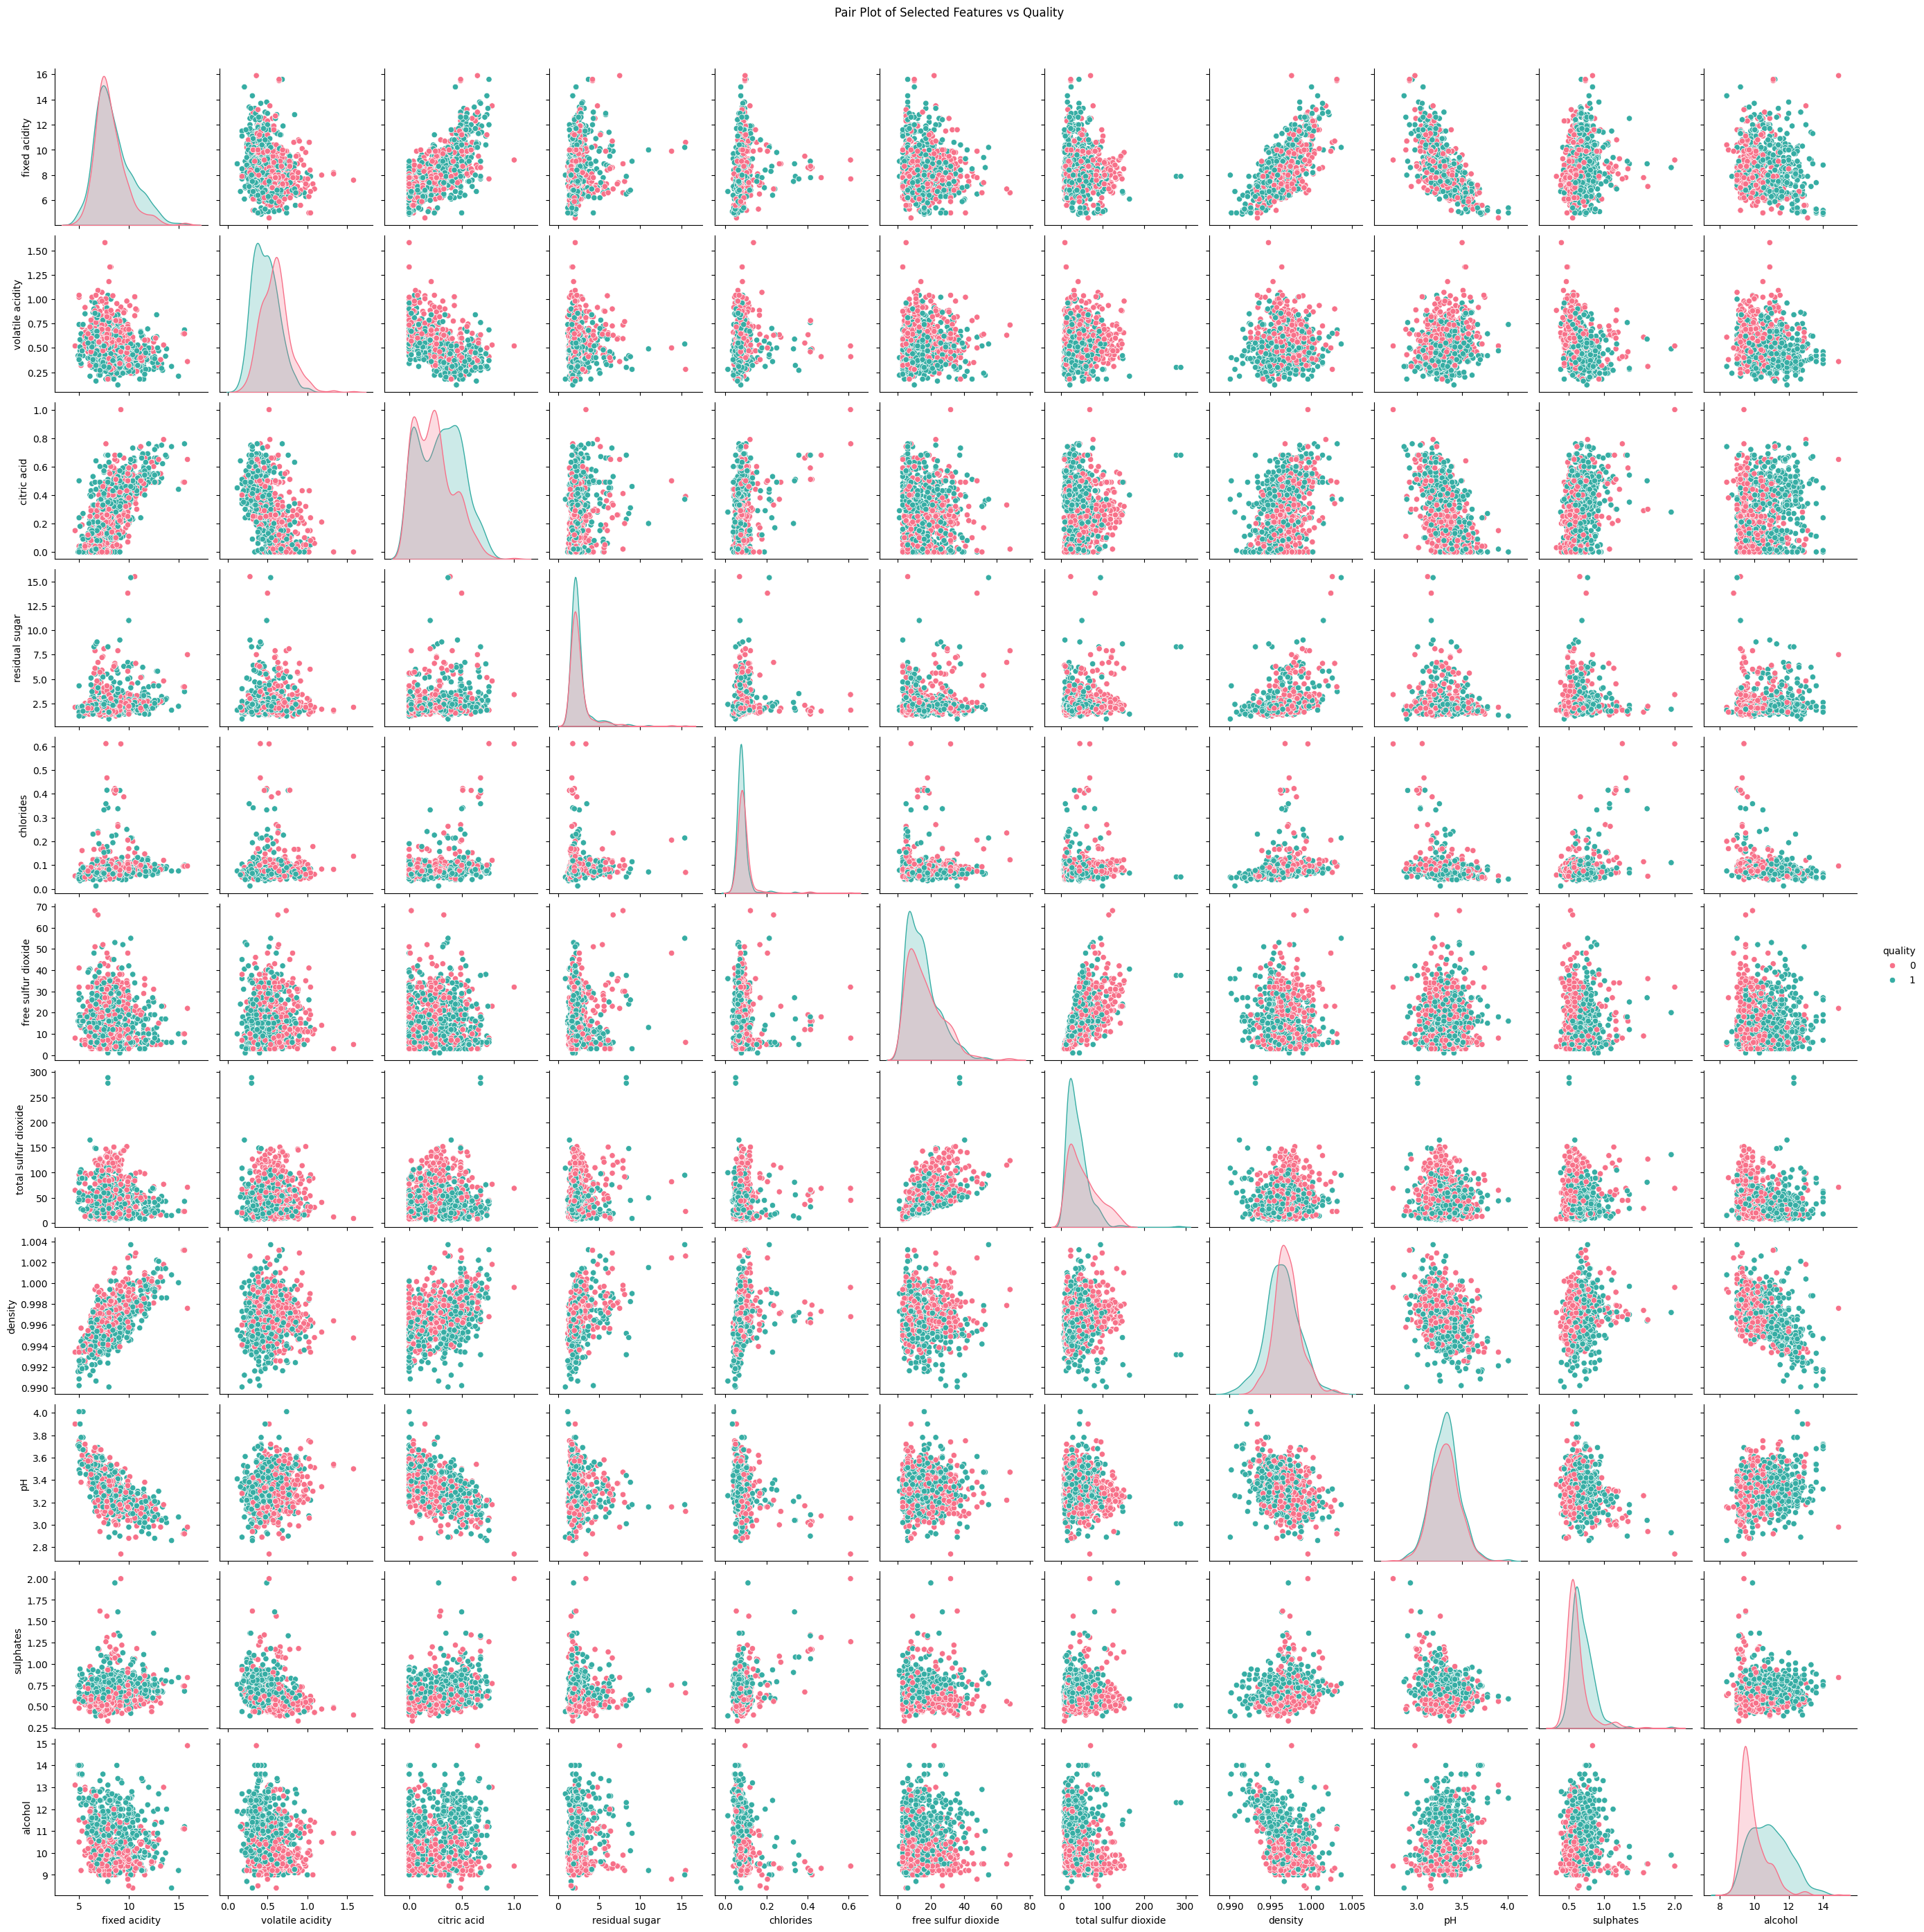

In [18]:
'''
Before going further let's plot the pair plot to see the relation of inputs and output.
'''

def plot_pairplots(x, y):
    if y.ndim > 1:
        y = y.squeeze()
    df = x.copy()
    df['quality'] = y
    sns.pairplot(df[df.columns.tolist()], hue='quality', palette='husl')
    plt.suptitle("Pair Plot of Selected Features vs Quality", y=1.02)
    plt.show()

plot_pairplots(x, y)


In [19]:
'''
Let's just try standarization.
'''

sc = StandardScaler()
x = sc.fit_transform(x)

In [20]:
'''
Split the data in training and testing.
'''

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [21]:
print(f"{x_train.shape} \n{y_train.shape} \n{x_test.shape} \n{y_test.shape}")

(914, 11) 
(914, 1) 
(229, 11) 
(229, 1)


In [22]:
'''
Let's train the model.
'''

rf = RandomForestClassifier(n_estimators=500)
rf.fit(x_train, y_train)

d:\Projects\ML Projects\End-to-End Wine Quality\End-to-End-ML-Project\.venv\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=500)

In [23]:
y_pred = rf.predict(x_test)

In [24]:
'''
Let's create a function to evaluate the model.
'''

def eval_model(y_true, y_pred):
    report = classification_report(y_true, y_pred)
    matrix = confusion_matrix(y_true, y_pred)
    return (report, matrix)

(report, matrix) = eval_model(y_test, y_pred)
print(f"Classification Report:\n{report}")


'''
As we can see that the accuracy is approx 81% which is good.
Since after outlier removal the dataset size got decreased which affected the model training.
'''

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       109
           1       0.81      0.84      0.82       120

    accuracy                           0.81       229
   macro avg       0.81      0.81      0.81       229
weighted avg       0.81      0.81      0.81       229



'\nAs we can see that the accuracy is approx 81% which is good.\nSince after outlier removal the dataset size got decreased which affected the model training.\n'

'\nThis is pretty good model.\nWith 81% accuracy.\n'

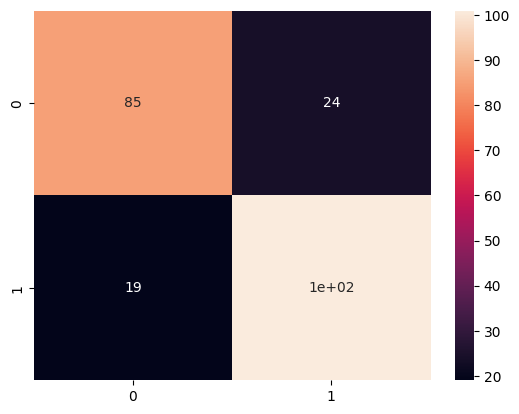

In [25]:
sns.heatmap(matrix, annot=True)


'''
This is pretty good model.
With 81% accuracy.
'''